In [1]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
shp_path = "Gminy/Gminy.shp"


In [3]:
#sf = shp.Reader(shp_path)
map_df = gpd.read_file(shp_path)
map_df.head(1)

,JPT_SJR_KO,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,...,JPT_KJ_I_1,JPT_KJ_I_2,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry
0,GMI,2602042,NagÅowice,None,13031,2012-09-26,None,2012-09-26,None,None,...,2602042,None,None,UZG,0,826826,None,0.752667,0.014911,"POLYGON ((20.13719 50.59346, 20.13708 50.59347..."


In [4]:
map_df.shape

(2477, 30)

In [5]:
#map_df['JPT_KOD_JE']=map_df['JPT_KOD_JE'].str[0:6]
map_df['JPT_KOD_JE']=map_df['JPT_KOD_JE'].str[0:7]

In [6]:
map_df.head(1)

,JPT_SJR_KO,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,...,JPT_KJ_I_1,JPT_KJ_I_2,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry
0,GMI,2602042,NagÅowice,None,13031,2012-09-26,None,2012-09-26,None,None,...,2602042,None,None,UZG,0,826826,None,0.752667,0.014911,"POLYGON ((20.13719 50.59346, 20.13708 50.59347..."


In [7]:
#mieszkania_puste = pd.read_csv("gminy-seniorzy.csv", sep=',',dtype=str) 
mieszkania_puste = pd.read_csv("gminy-seniorzy_04-11-2020_15-00.csv", sep=',',dtype=str) 

#mieszkania_puste.head()


In [32]:
#mieszkania_puste["Gmina kod uk"]=mieszkania_puste["Gmina kod uk"].astype(str)+mieszkania_puste["Typ gminy kod"].astype(str)
mieszkania_puste["Gmina kod uk"]=mieszkania_puste["Gmina kod uk"].astype(str)
mieszkania_puste.head()

,Gmina kod uk,Liczba wszystkich zgłoszeń
0,0201011,8
1,0201022,1
2,0201043,1
3,0201052,2
4,0202011,5


In [33]:
#mieszkania_puste=mieszkania_puste.iloc[:,[0,1,3]]
#mieszkania_puste.head()

In [42]:
#mieszkania_puste=mieszkania_puste[['Nazwa','Wartosc','JPT_KOD_JE']]

merged3 = map_df.merge(mieszkania_puste, how='left', left_on="JPT_KOD_JE", right_on="Gmina kod uk")
merged3.shape

(2477, 32)

In [43]:
merged3['Liczba wszystkich zgłoszeń'] = merged3['Liczba wszystkich zgłoszeń'].fillna(0)
merged3['Liczba wszystkich zgłoszeń']=merged3['Liczba wszystkich zgłoszeń'].astype(int)
#

In [44]:
merged3['Liczba wszystkich zgłoszeń'].head(10)

0     1
1     2
2     1
3     1
4     0
5    12
6     3
7     2
8     2
9     1
Name: Liczba wszystkich zgłoszeń, dtype: int32

In [45]:
vmin = merged3['Liczba wszystkich zgłoszeń'].min()
vmax = merged3['Liczba wszystkich zgłoszeń'].max()

In [46]:
vmin

0

In [47]:
vmax

352

C:\Users\rkiermasz\.conda\envs\rki env 1\lib\site-packages\mapclassify\classifiers.py:236: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
C:\Users\rkiermasz\.conda\envs\rki env 1\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


<AxesSubplot:title={'center':'Liczba zgłoszeń seniora'}>

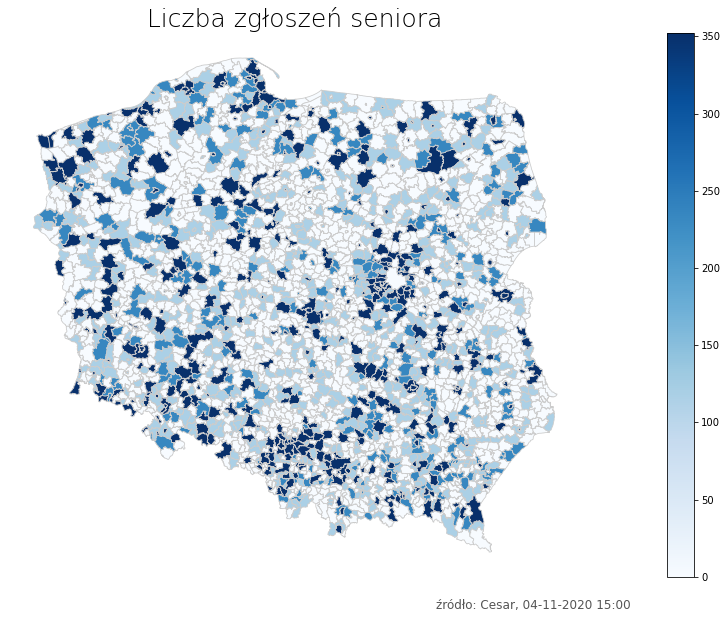

In [49]:
# set the value column that will be visualised
variable = 'Liczba wszystkich zgłoszeń'# set the range for the choropleth values

vmin = 0
vmax = 352
 
#reate figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))# remove the axis
ax.axis('off')# add a title and annotation
ax.set_title('Liczba zgłoszeń seniora', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('źródło: Cesar, 04-11-2020 15:00', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it# add the colorbar to the figure
fig.colorbar(sm)# create map
merged3.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', scheme='quantiles')
